In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import requests
import math
import re
import csv
import mplhep as hep

## Comparing Run 2 and Run 3 trigger rates: checking single- and double-objects seeds representative of each object type

#### Ephemeral HLTPhysics 2022 (Run D, 9 parts) - run 357688: 4819637 events (50 LS in LS = [35,84] for PU=52: events)                                                                                                                                                                      
L1Ntuples ZBHLTPhysics2022: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run357688/
 
#### Ephemeral HLTPhysics 2018 (Run D, 8 parts) - run 325097: 672287 events (36 LS in LS = [58,93] for PU=52: events)                                                                                                                                                                        
L1Ntuples ZBHLTPhysics2018: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run325097/


In [2]:
# Countings and thresholds + Lists for rate computation
# MU #
mu_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26, 27]
n_SingleMu_CountingsRun2 =  [44830, 42134, 40675, 37996, 35512, 33356, 29102, 27307]
n_SingleMu_CountingsRun3 =  [108640, 105782, 102614, 95138, 85806, 80201, 75515, 70150]
rate_muon_algo_Run2 = []
rate_muon_algo_Run3 = []

# EG #
eg_pt_thresholds =  [32, 33, 34, 35, 36, 37, 38, 39, 40]
n_SingleEG_CountingsRun2 =  [109126, 100902, 92381, 84201, 76889, 70501, 64609, 59079, 54032]
n_SingleEG_CountingsRun3 =  [190789, 175303, 161018, 146702, 132603, 121594, 110804, 101500, 92755]
rate_eg_algo_Run2 = []
rate_eg_algo_Run3 = []
doubleeg_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26]
n_DoubleLooseIsoEG_CountingsRun2 =  [0, 0, 0, 0, 0, 0, 0, 0]
n_DoubleLooseIsoEG_CountingsRun3 =  [0, 0, 0, 0, 0, 0, 0, 0]
rate_doubleeg_algo_Run2 = []
rate_doubleeg_algo_Run3 = []

# TAU #
tau_pt_thresholds =  [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
n_SingleTau_CountingsRun2 =  [12993, 12683, 12394, 12120, 11848, 11574, 11346, 11082, 10854, 10605, 10401]
n_SingleTau_CountingsRun3 =  [19376, 18865, 18353, 17891, 17431, 17017, 16598, 16168, 15732, 15347, 14948]
rate_tau_algo_Run2 = []
rate_tau_algo_Run3 = []
doubleisotau_pt_thresholds =  [30, 31, 32, 33, 34, 35, 36]
n_DoubleIsoTau_CountingsRun2 =  [94959, 91583, 89054, 79823, 71396, 65048, 60121]
n_DoubleIsoTau_CountingsRun3 =  [158896, 151035, 144879, 131478, 119029, 108049, 97587]
rate_doubleisotau_algo_Run2 = []
rate_doubleisotau_algo_Run3 = []

# JET #
jet_pt_thresholds =  [120, 125, 130, 135, 140, 145, 150, 155, 160]
n_SingleJet_CountingsRun2 =  [53293, 47521, 42043, 37424, 33283, 29602, 26482, 23637, 21329]
n_SingleJet_CountingsRun3 =  [82102, 73513, 64686, 57085, 51096, 46262, 42161, 37803, 32946]
rate_jet_algo_Run2 = []
rate_jet_algo_Run3 = []

# MET #
met_thresholds =  [70, 72, 75, 78, 80, 85, 90, 95, 100]
n_ETMHF_CountingsRun2 =  [40232, 37808, 34570, 31902, 30283, 26888, 24250, 20225, 17389]
n_ETMHF_CountingsRun3 =  [35257, 33435, 31069, 29148, 28057, 21198, 16767, 13587, 11395]
rate_met_algo_Run2 = []
rate_met_algo_Run3 = []

In [3]:
# RATE COMPUTATION
# 2018: N_countings * PS/n_Parts (HLTPhysics) / (23.3*n_LS) = N_countings * 1100/8 (HLTPhysics) / (23.3*36) 
# 2022: N_countings * PS (HLTPhysics) / (23.3*n_LS) = N_countings * 75 (HLTPhysics) / (23.3*50)

for mu in range(len(mu_pt_thresholds)):
    rate_muon_algo_Run2.append(n_SingleMu_CountingsRun2[mu] * 1100/8 / (23.3*36*1000))
    rate_muon_algo_Run3.append(n_SingleMu_CountingsRun3[mu] * 75 / (23.3*50*1000))
    
for eg in range(len(eg_pt_thresholds)):
    rate_eg_algo_Run2.append(n_SingleEG_CountingsRun2[eg] * 1100/8 / (23.3*36*1000))
    rate_eg_algo_Run3.append(n_SingleEG_CountingsRun3[eg] * 75 / (23.3*50*1000))
    
for twoeg in range(len(doubleeg_pt_thresholds)):
    rate_doubleeg_algo_Run2.append(n_DoubleLooseIsoEG_CountingsRun2[twoeg] * 1100/8 / (23.3*36*1000))
    rate_doubleeg_algo_Run3.append(n_DoubleLooseIsoEG_CountingsRun3[twoeg] * 75 / (23.3*50*1000)) 
    
for tau in range(len(tau_pt_thresholds)):
    rate_tau_algo_Run2.append(n_SingleTau_CountingsRun2[tau] * 1100/8 / (23.3*36*1000))
    rate_tau_algo_Run3.append(n_SingleTau_CountingsRun3[tau] * 75 / (23.3*50*1000)) 
    
for twotau in range(len(doubleisotau_pt_thresholds)):
    rate_doubleisotau_algo_Run2.append(n_DoubleIsoTau_CountingsRun2[twotau] * 1100/8 / (23.3*36*1000))
    rate_doubleisotau_algo_Run3.append(n_DoubleIsoTau_CountingsRun3[twotau] * 75 / (23.3*50*1000)) 
    
for jet in range(len(jet_pt_thresholds)):
    rate_jet_algo_Run2.append(n_SingleJet_CountingsRun2[jet] * 1100/8 / (23.3*36*1000))
    rate_jet_algo_Run3.append(n_SingleJet_CountingsRun3[jet] * 75 / (23.3*50*1000))
    
for met in range(len(met_thresholds)):
    rate_met_algo_Run2.append(n_ETMHF_CountingsRun2[met] * 1100/8 / (23.3*36*1000))
    rate_met_algo_Run3.append(n_ETMHF_CountingsRun3[met] * 75 / (23.3*50*1000))

#### Rate for ZeroBias/HLTPhysics
is given by: *Nevents passing * PS(HLT+L1 of ZeroBias/HLTPhysics) / (number of processed LS * 23.2s * N_bunch crossings)*,

where: *N_bunch crossings = 2544 for Fill 7333 (and 35 LS),  = 2400 for Fill 8142 (and 50 LS)*

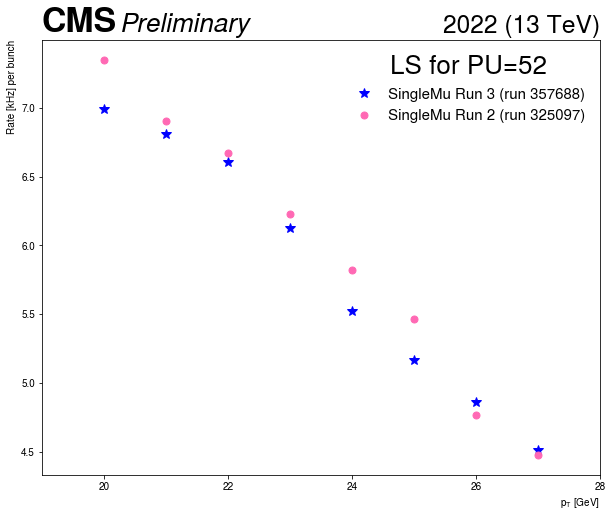

In [4]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(19., 28.)
#plt.ylim(0., 1)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

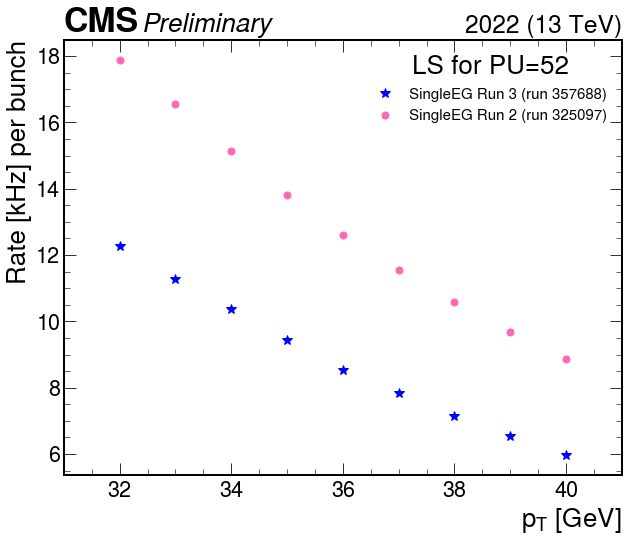

In [6]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_eg_LS_Run3 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run3, '*', color="blue", markersize=10, label = "SingleEG Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(31., 41.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

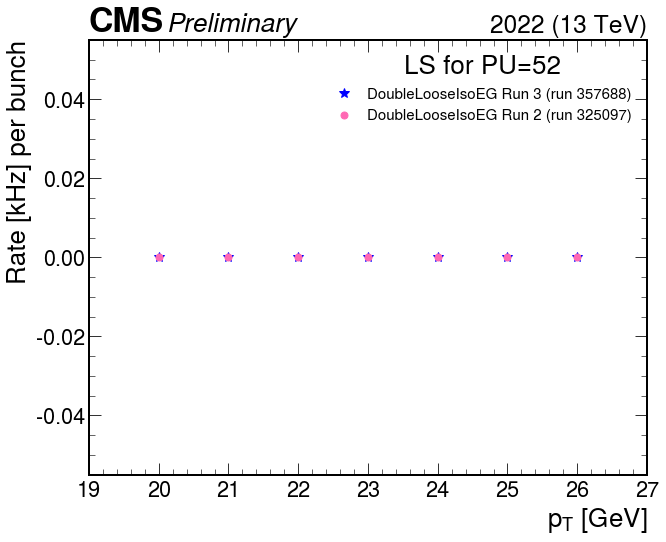

In [8]:
p_twoeg_LS_Run3, p_twoeg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twoeg_LS_Run3 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run3, '*', color="blue", markersize=10, label = "DoubleLooseIsoEG Run 3 (run 357688)")
p_twoeg_LS_Run2 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleLooseIsoEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(19., 27.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

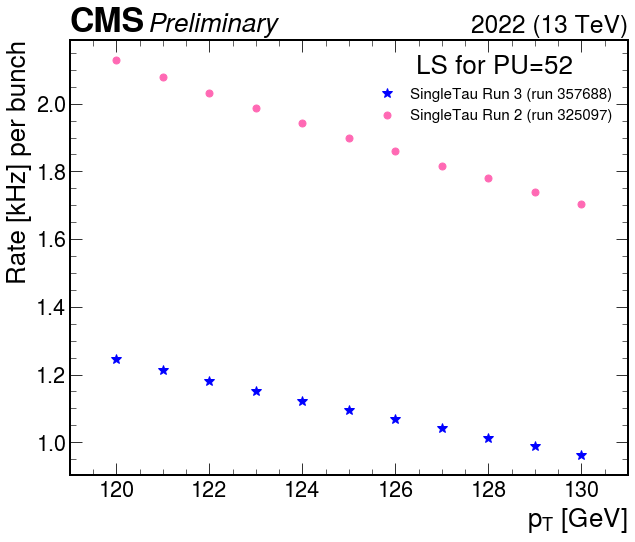

In [10]:
p_tau_LS_Run3, p_tau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_tau_LS_Run3 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run3, '*', color="blue", markersize=10, label = "SingleTau Run 3 (run 357688)")
p_tau_LS_Run2 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(119., 131.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

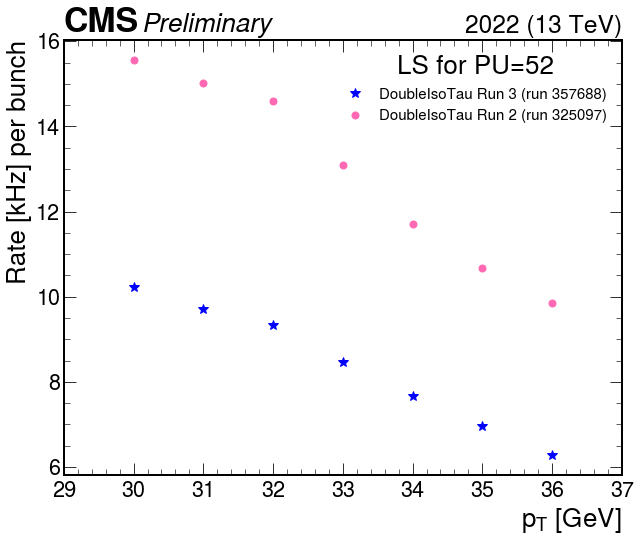

In [12]:
p_twotau_LS_Run3, p_twotau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twotau_LS_Run3 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run3, '*', color="blue", markersize=10, label = "DoubleIsoTau Run 3 (run 357688)")
p_twotau_LS_Run2 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleIsoTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(29., 37.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

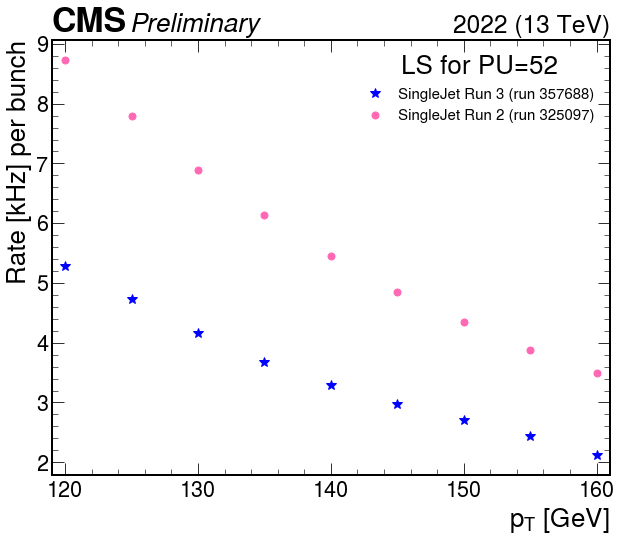

In [13]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3, '*', color="blue", markersize=10, label = "SingleJet Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleJet Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(119., 161.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

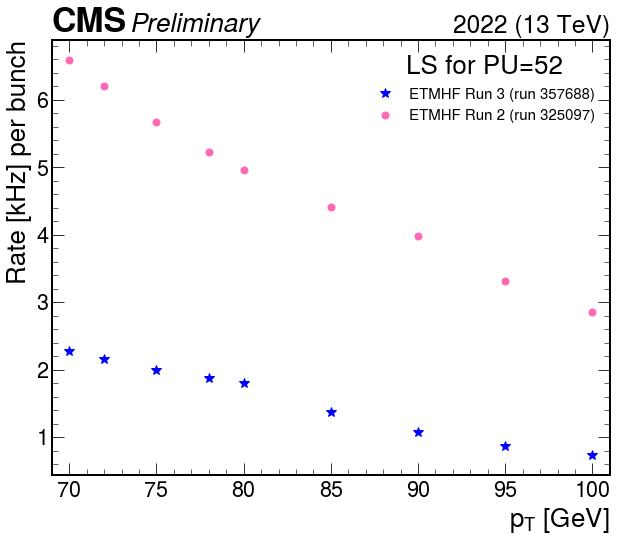

In [15]:
p_met_LS_Run3, p_met_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_met_LS_Run3 = plt.plot(met_thresholds, rate_met_algo_Run3, '*', color="blue", markersize=10, label = "ETMHF Run 3 (run 357688)")
p_met_LS_Run2 = plt.plot(met_thresholds, rate_met_algo_Run2, '.', color="hotpink", markersize=14, label = "ETMHF Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(69., 101.)
#plt.ylim(0., 1)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)